In [150]:
import certifi
import os
os.environ['SSL-CERT_FILE'] = certifi.where()
from giza_datasets import DatasetsLoader


loader = DatasetsLoader()
df = loader.load("gora-competition-training")

Dataset read from cache.
Loading dataset gora-competition-training from cache.


In [151]:
df = df.to_pandas()

In [159]:
df = df[df.columns[~pd.Series(df.columns).isin(['calc_start_time', 'added_at' ,'__index_level_0__', 'date'])]]
df.sort_values(by = ['address', 'days_since_first_borrow'], inplace = True, ascending = False)
df.drop_duplicates(subset = df.drop('days_since_first_borrow', axis=1).columns, inplace = True)


In [160]:
df.to_csv("gora-competition-real-training.csv", index=False)

In [161]:
df.liquidated.value_counts(normalize=True)

liquidated
0.0    0.807434
1.0    0.192566
Name: proportion, dtype: float64

In [154]:
df.total_liquidation_to_total_borrow

0         0.000000
1         0.970264
2         1.006330
3         0.000000
4         0.000000
            ...   
783317    0.000000
783318    0.000000
783319    0.000000
783320    0.000000
783321    0.931344
Name: total_liquidation_to_total_borrow, Length: 754706, dtype: float64

In [141]:
df[['total_liquidation_to_total_borrow','liquidated']][80:120]

,total_liquidation_to_total_borrow,liquidated
80,0.000000,0.0
81,0.000000,0.0
82,1.066029,1.0
83,0.000000,0.0
84,0.000000,0.0
85,0.000000,0.0
86,0.938904,1.0
87,0.000000,0.0
88,0.000000,0.0
89,0.710571,1.0


<Axes: xlabel='first_borrow_date'>

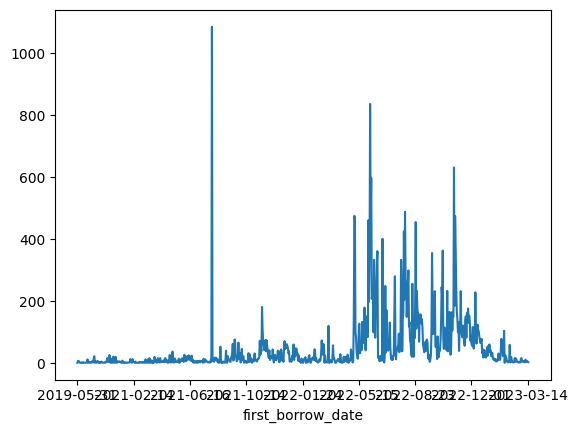

In [143]:
df.groupby('first_borrow_date').count().address.plot()

<Axes: xlabel='first_borrow_date'>

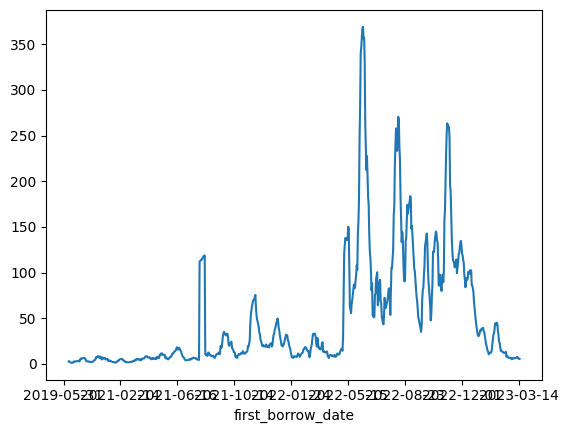

In [144]:
df.groupby('first_borrow_date').count().address.rolling(window=10).mean().plot()

In [146]:
df[['address', 'first_borrow_date']].value_counts().to_frame().reset_index().rename(columns={0: 'count'}).sort_values('count', ascending=False).address.value_counts()

address
0xd1a8dd23e356b9fae27df5def9ea025a602ec81e    4
0x91191d0ebdbf928829c2e66c7bfe23d6d241a260    3
0x325409632bccffac706d378a2eca57cafa21ab11    3
0x4929f4d38f2955649b5aa34343da04cf790b9d92    3
0x81a8f3091f0d218e04349dd595e4b7470fee323a    3
                                             ..
0x86fe805dc5ca7aa17d43f6f8394f7fcccd41ed1f    1
0x86b3275ab0e47e4906a3ab4dd6226abec6acd00d    1
0xf88d2f91a5df07a106a5386419b37471ef565b69    1
0x86d59c9ce036fece951bfa720823b8216e34aeb1    1
0x7e74b1e35ff6ca72e6ffc0a86e4afeb023011e56    1
Name: count, Length: 14905, dtype: int64

In [12]:
df[['calc_start_time', 'first_borrow_date']]

,calc_start_time,first_borrow_date
0,2023-02-04 16:06:12.097,2022-05-07
1,2023-03-01 16:06:24.346,2022-08-02
2,2023-02-03 16:06:11.043,2022-11-21
3,2023-02-05 16:06:16.899,2022-08-27
4,2023-01-18 21:18:42.947,2022-09-06
...,...,...
783317,2023-03-11 16:06:34.372,2022-02-15
783318,2023-02-17 16:06:19.246,2022-08-21
783319,2023-03-10 16:06:41.333,2023-01-24
783320,2023-02-01 16:06:09.451,2022-08-23


In [164]:
forbidden =['total_liquidation', 'count_liquidation', 'avg_liquidation_amount', 'std_liquidation_amount', 'liquidation_amount_cv', 'avg_liquidation_to_avg_borrow', 'liquidated']

# forbidden =['total_liquidation', 'count_liquidation', 'avg_liquidation_amount', 'std_liquidation_amount', 'liquidation_amount_cv', 'avg_liquidation_to_avg_borrow']
predictors_df = df[df.columns[~df.columns.isin(forbidden)]]


In [170]:
import numpy as np

commonly_borrowed_tokens_tokens = predictors_df.token_borrow_mode.str.lower().value_counts(normalize=True)[predictors_df.token_borrow_mode.str.lower().value_counts(normalize=True)*100>1].index

predictors_df['token_borrowed'] = np.where(predictors_df.token_borrow_mode.str.lower().isin(commonly_borrowed_tokens_tokens), predictors_df.token_borrow_mode.str.lower(), 'other')

predictors_df.drop('token_borrow_mode', axis=1, inplace=True)

/var/folders/3d/3_dbb7097rzc81cpv1mrh_nr0000gn/T/ipykernel_37083/2399983088.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictors_df['token_borrowed'] = np.where(predictors_df.token_borrow_mode.str.lower().isin(commonly_borrowed_tokens_tokens), predictors_df.token_borrow_mode.str.lower(), 'other')
/var/folders/3d/3_dbb7097rzc81cpv1mrh_nr0000gn/T/ipykernel_37083/2399983088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictors_df.drop('token_borrow_mode', axis=1, inplace=True)


In [171]:
predictors_df.days_since_first_borrow

773164    174.0
582606    122.0
527258    170.0
709361     82.0
294440     30.0
          ...  
613620    231.0
85615     116.0
666152     97.0
283939     70.0
252667    204.0
Name: days_since_first_borrow, Length: 38688, dtype: float64

In [172]:
predictors_df = predictors_df[['total_borrow', 'count_borrow', 'avg_borrow_amount',
       'std_borrow_amount', 'borrow_amount_cv',
       'total_repay', 'count_repay', 'avg_repay_amount', 'std_repay_amount',
       'repay_amount_cv', 'total_deposit', 'count_deposit',
       'avg_deposit_amount', 'std_deposit_amount', 'deposit_amount_cv',
       'total_redeem', 'count_redeem', 'avg_redeem_amount',
       'std_redeem_amount', 'redeem_amount_cv', 'days_since_first_borrow',
       'net_outstanding', 'int_paid', 'net_deposits',
       'count_repays_to_count_borrows', 'avg_repay_to_avg_borrow',
       'net_outstanding_to_total_borrowed', 'net_outstanding_to_total_repaid',
       'count_redeems_to_count_deposits', 'total_redeemed_to_total_deposits',
       'avg_redeem_to_avg_deposit', 'net_deposits_to_total_deposits',
       'net_deposits_to_total_redeemed', 'dex_total_sum_added',
       'dex_total_sum_removed', 'dex_total_sum_swapped', 'token_borrowed', 'total_liquidation_to_total_borrow']]

In [173]:
predictors_df.token_borrowed.value_counts(normalize=True)

token_borrowed
usdc      0.535256
dai       0.348196
ghst      0.039211
wmatic    0.027967
other     0.019515
weth      0.015715
usdt      0.014139
Name: proportion, dtype: float64

Training RMSE: 0.016754918779349467
Test RMSE: 0.08805926436449325


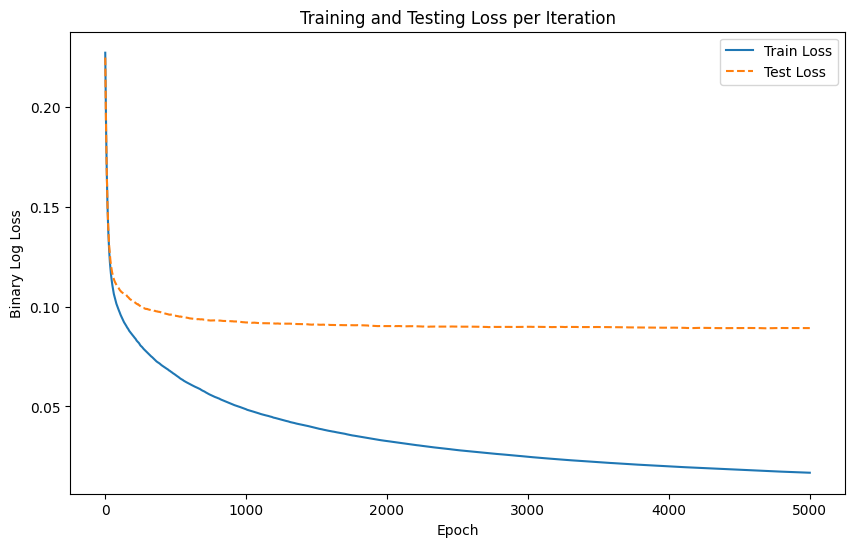

In [179]:
import pandas as pd

# Convert 'token_borrowed' column to dummies
try:
    token_borrowed_dummies = pd.get_dummies(predictors_df['token_borrowed'], prefix='token')
    predictors_df = pd.concat([predictors_df, token_borrowed_dummies], axis=1)
    predictors_df.drop('token_borrowed', axis=1, inplace=True)
except:
    pass
from sklearn.model_selection import train_test_split

# Separate features and target
X = predictors_df.drop('total_liquidation_to_total_borrow', axis=1)
y = predictors_df['total_liquidation_to_total_borrow']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import lightgbm as lgb

# Prepare the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters for the LightGBM model
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the model
evals_result = {}

# Train the model with evaluation results
num_round = 5000
bst = lgb.train(params, train_data, num_round, valid_sets=[train_data, test_data], 
                valid_names=['train', 'test'], callbacks=[
                        #lgb.early_stopping(stopping_rounds=300), 
                        lgb.record_evaluation(evals_result)] )

from sklearn.metrics import log_loss

# Predict probabilities for the training and testing data
y_train_pred = bst.predict(X_train)
y_test_pred = bst.predict(X_test)
y_test_pred = np.maximum(0, y_test_pred)
from sklearn.metrics import mean_squared_error

# Calculate the log loss for training and test sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Training RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

# Extract the log losses for both training and test sets
train_losses = evals_result['train']['rmse']
test_losses = evals_result['test']['rmse']

# Generate the epochs range
epochs = range(1, len(train_losses) + 1)

# Plotting the training and testing loss curves
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss', linestyle='--')
plt.title('Training and Testing Loss per Iteration')
plt.xlabel('Epoch')
plt.ylabel('Binary Log Loss')
plt.legend()
plt.show()

In [180]:
# y_test_pred = bst.predict(X_test)
# y_test_pred = bst.predict(X_test)
X_test_eval = X_test.copy()
X_test_eval['y'] = y_test
y_test_pred = np.maximum(0, y_test_pred)
X_test_eval['y_pred'] = y_test_pred


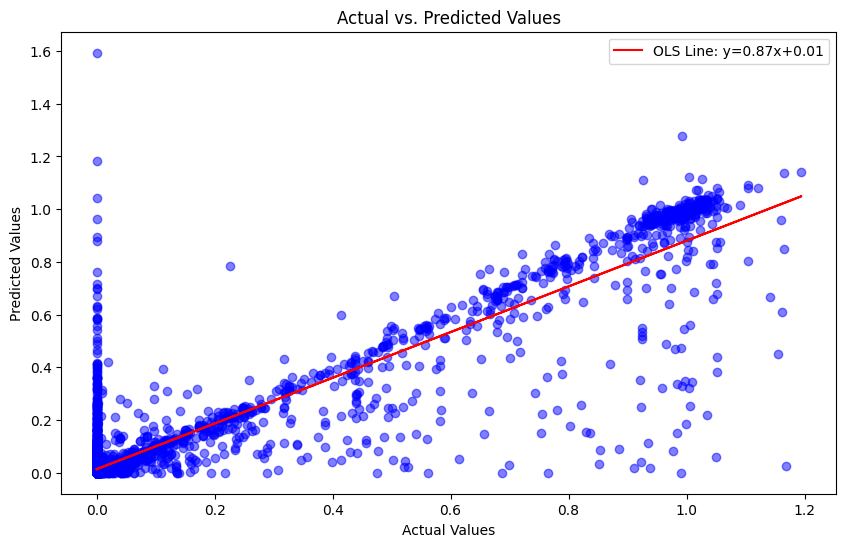

In [181]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test_eval['y'], X_test_eval['y_pred'], alpha=0.5, color='blue')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Fit and plot OLS regression line
m, b = np.polyfit(X_test_eval['y'], X_test_eval['y_pred'], 1)
plt.plot(X_test_eval['y'], m*X_test_eval['y'] + b, color='red', label=f'OLS Line: y={m:.2f}x+{b:.2f}')

plt.legend()
plt.show()

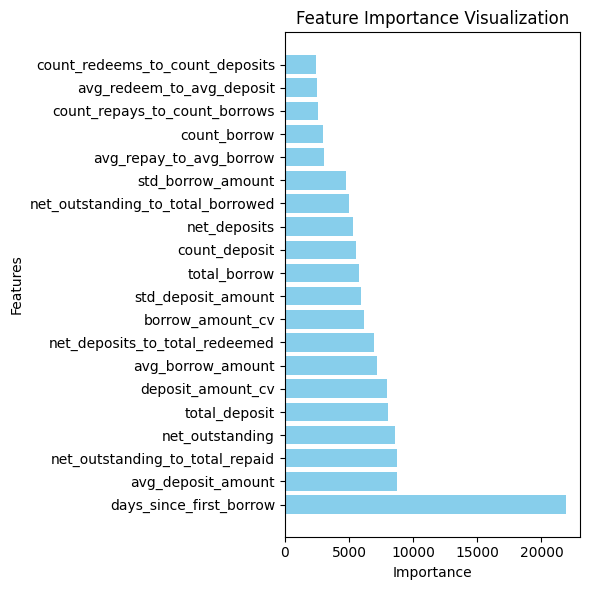

In [178]:
importance = bst.feature_importance()

# Get feature names
feature_names = bst.feature_name()

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature Name': feature_names,
    'Importance': importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
feature_importance_df =feature_importance_df[:20]
# Creating the plot
plt.figure(figsize=(6, 6))
plt.barh(feature_importance_df['Feature Name'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance Visualization')
plt.tight_layout()

# Show the plot
plt.show()